In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
pip install dtale

     |████████████████████████████████| 7.7MB 2.2MB/s 
     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 645kB 8.5MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 1.8MB 6.7MB/s 
     |████████████████████████████████| 1.0MB 23.5MB/s 
     |████████████████████████████████| 3.4MB 35.6MB/s 
     |████████████████████████████████| 194kB 43.9MB/s 
     |████████████████████████████████| 1.8MB 42.1MB/s 
     |████████████████████████████████| 358kB 47.8MB/s 
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-cp36-none-any.whl size=62599 sha256=8007349a5860ce834b43020080ebe61f010399f1285c4ede9596daeb5ed462f0
  Stored in directory: /root/.cache/pip/wheels/0e/4a/1c/3490cfe6a59299b06917af6626a969c8fb7caead39b2d74cf2
  Created wheel for dash-daq: filename=dash_daq-0.5.0-cp36-n

In [3]:
pip install rouge-score

In [4]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk import FreqDist
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Bidirectional
from tensorflow.keras.models import Model
import keras
import dtale
from tqdm import tqdm

##Loading Dataset

In [5]:
# load the data
df_english = pd.read_csv('/content/drive/My Drive/small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('/content/drive/My Drive/small_vocab_fr.csv', sep = '/t', names = ['french'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [6]:
# joining the data frames
df = pd.concat([df_english , df_french] , axis =1 )
del(df_english)
del(df_french)
df.head()

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


In [7]:
import dtale.app as dtale_app

dtale_app.USE_NGROK = True

dtale.show(df , ignore_duplicate=True)

http://8dd15c013f57.ngrok.io/dtale/main/1

##Cleaning the dataset

In [8]:
# function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

remove_punc("Hey!! How are you man?")

'Hey How are you man'

In [9]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [10]:
#converting into list
eng = df['english'].tolist()
fren = df['french'].tolist()

##Visualization

###English

In [11]:
#https://stackoverflow.com/questions/41699065/create-vocabulary-dictionary-for-text-mining

word_dist_english = FreqDist()
for s in eng:
    word_dist_english.update(s.split())


print("\nTotal number of words " , len(word_dist_english))


Total number of words  199


In [12]:
english_words = [i[0] for i in word_dist_english.most_common(len(word_dist_english))]
english_counts = [i[1] for i in word_dist_english.most_common(len(word_dist_english))]

In [13]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

The distribution is highly skewed. 

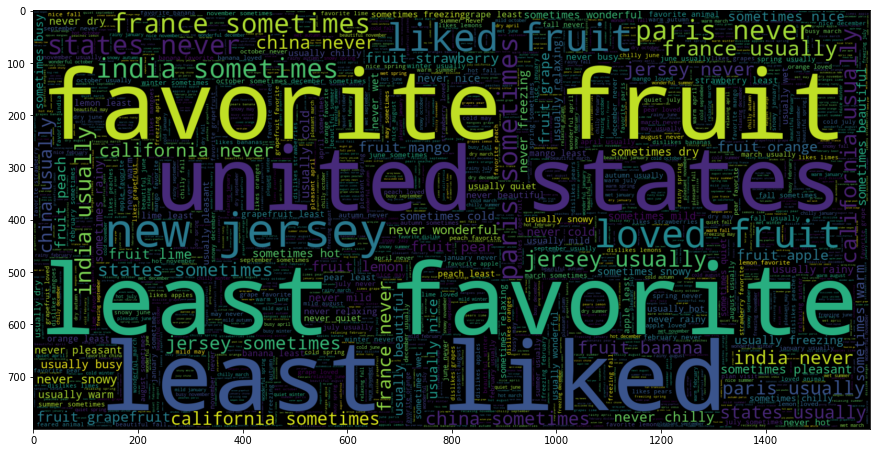

In [14]:
# plot the word cloud for text that is Real
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(eng))
plt.imshow(wc, interpolation = 'bilinear')

In [17]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in eng:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


###French

In [18]:
#https://stackoverflow.com/questions/41699065/create-vocabulary-dictionary-for-text-mining

word_dist_french = FreqDist()
for s in fren:
    word_dist_french.update(s.split())


print("\nTotal number of words " , len(word_dist_french))


Total number of words  350


In [19]:
french_words = [i[0] for i in word_dist_french.most_common(len(word_dist_french))]
french_counts = [i[1] for i in word_dist_french.most_common(len(word_dist_french))]

In [20]:
# Plot barplot using plotly 
fig = px.bar(x = french_words, y = french_counts)
fig.show()

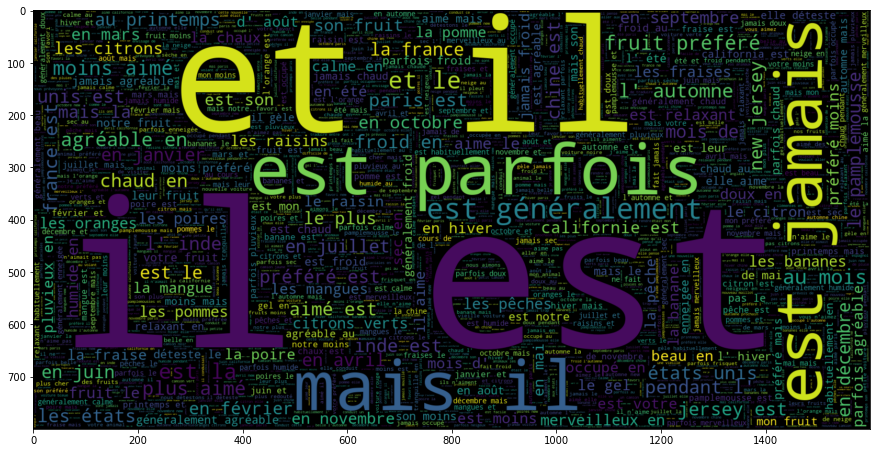

In [21]:
# plot the word cloud for text that is Real
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(fren))
plt.imshow(wc, interpolation = 'bilinear')

In [22]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in fren:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  23


##Tokenization

###English

In [23]:
#mapping word to index and vice versa
#leaving 0 for padding
word2idx_english = {w : i+1  for i,w in enumerate(english_words)}
idx2word_english = { i+1 : w for i,w in enumerate(english_words)}


In [24]:
idx2word_english[1]

'is'

In [25]:
word2idx_english['is']

1

In [26]:
def tokenize_eng(doc ):
  vec = []
  for s in tqdm(doc):
    sen = []
    for word in s.split():
      sen.append(word2idx_english[word])
    vec.append(sen)
  #padding with zeros
  vec = keras.preprocessing.sequence.pad_sequences(vec, padding="post")
  return vec


In [27]:
eng = tokenize_eng(eng)

100%|██████████| 137860/137860 [00:00<00:00, 246278.21it/s]


In [28]:
eng.shape

(137860, 15)

In [29]:
def detokenize_eng(vec):
  doc =[]
  for sen in vec:
    s = ""
    for tok in sen:
      if(tok == 0): #if end of sentence is reached
        break
      s += " " + idx2word_english[tok]
    doc.append(s)
  return doc


In [30]:
print("sentence : " , detokenize_eng(eng[1:2]))
print("tokenized sentence :" , eng[0])

sentence :  [' the united states is usually chilly during july and it is usually freezing in november']
tokenized sentence : [17 23  1  8 67  4 39  7  3  1 55  2 44  0  0]


###french

In [31]:
word2idx_french = {w : i+1  for i,w in enumerate(french_words)}
idx2word_french = { i+1 : w for i,w in enumerate(french_words)}


In [32]:
idx2word_french[1]

'est'

In [33]:
word2idx_french['est']

1

In [34]:
def tokenize_fren(doc ):
  vec = []
  for s in tqdm(doc):
    sen = []
    for word in s.split():
      sen.append(word2idx_french[word])
    vec.append(sen)
  #padding with zeros
  vec = keras.preprocessing.sequence.pad_sequences(vec, padding="post" )
  return vec


In [35]:
fren = tokenize_fren(fren)

100%|██████████| 137860/137860 [00:00<00:00, 217542.62it/s]


In [36]:
fren.shape

(137860, 21)

In [37]:
def detokenize_fren(vec):
  doc =[]
  for sen in vec:
    s = ""
    for tok in sen:
      if(tok == 0): #if end of sentence is reached
        break
      s += " " + idx2word_french[tok]
    doc.append(s)
  return doc


In [38]:
print("sentence : " , detokenize_fren(fren[1:2]))
print("tokenized sentence :" , fren[1])

sentence :  [' les états-unis est généralement froid en juillet et il gèle habituellement en novembre']
tokenized sentence : [ 4 31  1 12 19  2 48  6  3 94 68  2 50  0  0  0  0  0  0  0  0]


In [81]:
# Train test split
from sklearn.model_selection import train_test_split
#for french to engliosh translation
x_train, x_test, y_train, y_test = train_test_split(fren, eng, test_size = 0.1)

In [82]:
x_train.shape , y_train.shape

((124074, 21), (124074, 15))

In [83]:
x_test.shape , y_test.shape

((13786, 21), (13786, 15))

##Model

###LSTM

In [42]:
from keras.utils import to_categorical

In [84]:
#categorizing the output sequence
y_train = [to_categorical(sent , num_classes = 200) for sent in y_train]

#y_test = [to_categorical(sent , num_classes = 200) for sent in y_test]

In [85]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [86]:
y_train.shape , y_test.shape

((124074, 15, 200), (13786, 15))

In [87]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding( 351, 256, input_length = 21 , mask_zero = True))
# encoder
model.add(LSTM(256 ) ), 

# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,21,256)
model.add(RepeatVector(maxlen_english))

model.add(LSTM(256, return_sequences= True) ) ,
model.add(TimeDistributed(Dense( 200, activation ='softmax')))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 21, 256)           89856     
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 15, 256)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 15, 256)           525312    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 15, 200)           51400     
Total params: 1,191,880
Trainable params: 1,191,880
Non-trainable params: 0
_________________________________________________________________


In [88]:
# train the model
history = model.fit(x_train, y_train, batch_size=1024, 
                    validation_split= 0.15, epochs=20,
                    )

Epoch 1/20
103/103 [==============================] - 8s 82ms/step - loss: 3.1418 - accuracy: 0.3527 - val_loss: 2.2451 - val_accuracy: 0.4778
Epoch 2/20
103/103 [==============================] - 7s 68ms/step - loss: 1.8424 - accuracy: 0.5206 - val_loss: 1.5497 - val_accuracy: 0.5740
Epoch 3/20
103/103 [==============================] - 7s 68ms/step - loss: 1.3347 - accuracy: 0.6230 - val_loss: 1.1393 - val_accuracy: 0.6627
Epoch 4/20
103/103 [==============================] - 7s 68ms/step - loss: 1.0438 - accuracy: 0.6751 - val_loss: 0.9361 - val_accuracy: 0.6955
Epoch 5/20
103/103 [==============================] - 7s 68ms/step - loss: 0.8766 - accuracy: 0.7098 - val_loss: 0.8249 - val_accuracy: 0.7256
Epoch 6/20
103/103 [==============================] - 7s 68ms/step - loss: 0.8733 - accuracy: 0.7155 - val_loss: 0.7854 - val_accuracy: 0.7343
Epoch 7/20
103/103 [==============================] - 7s 68ms/step - loss: 0.7358 - accuracy: 0.7506 - val_loss: 0.6971 - val_accuracy: 0.7635

In [89]:
#making predition 
y_pred = model.predict(x_test)
#tokenizing y_pred
y_target = []
for s in y_pred:
  sen = []
  for vec in s:
    x = np.argmax(vec)
    sen.append(x)
  y_target.append(sen)

 #detokenizing 
y_target = detokenize_eng(y_target)

In [90]:
#detokenizing y_test
y_test1 = detokenize_eng(y_test)

In [91]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)


r =[]
b = []
for ref , hypo in zip(y_test1 , y_target):
  
  r.append(scorer.score(ref , hypo)['rougeL'].fmeasure)

  b.append(nltk.translate.bleu_score.sentence_bleu([ref.split()], hypo.split() ,weights = (0.25, 0.25 , 0.25 , 0.25) ))


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().



In [92]:
print("Average rougeL(fmeasure) score : " , sum(r)/len(r))
print("Average bleu score(upto 4 grams) : " , sum(b)/len(b))

Average rougeL(fmeasure) score :  0.9670482728294115
Average bleu score(upto 4 grams) :  0.9242231670441209


###Bidirectional LSTM

In [93]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding( 351, 256, input_length = 21 , mask_zero = True))
# encoder
model.add(Bidirectional(LSTM(256 )) ), 

# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,21,256)
model.add(RepeatVector(maxlen_english))

model.add(Bidirectional(LSTM(256, return_sequences= True)) ) ,
model.add(TimeDistributed(Dense( 200, activation ='softmax')))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 21, 256)           89856     
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               1050624   
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 15, 512)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 15, 512)           1574912   
_________________________________________________________________
time_distributed_3 (TimeDist (None, 15, 200)           102600    
Total params: 2,817,992
Trainable params: 2,817,992
Non-trainable params: 0
_________________________________________________________________


In [94]:
# train the model
history = model.fit(x_train, y_train, batch_size=1024, 
                    validation_split= 0.15, epochs=20,
                    )

Epoch 1/20
103/103 [==============================] - 15s 146ms/step - loss: 2.5663 - accuracy: 0.4241 - val_loss: 1.7706 - val_accuracy: 0.5034
Epoch 2/20
103/103 [==============================] - 13s 123ms/step - loss: 1.3655 - accuracy: 0.6190 - val_loss: 1.0793 - val_accuracy: 0.6895
Epoch 3/20
103/103 [==============================] - 13s 123ms/step - loss: 1.0244 - accuracy: 0.6984 - val_loss: 0.8479 - val_accuracy: 0.7438
Epoch 4/20
103/103 [==============================] - 13s 123ms/step - loss: 0.7681 - accuracy: 0.7679 - val_loss: 0.6862 - val_accuracy: 0.7974
Epoch 5/20
103/103 [==============================] - 13s 123ms/step - loss: 0.7721 - accuracy: 0.7784 - val_loss: 0.7281 - val_accuracy: 0.7829
Epoch 6/20
103/103 [==============================] - 13s 123ms/step - loss: 0.5808 - accuracy: 0.8271 - val_loss: 0.5012 - val_accuracy: 0.8486
Epoch 7/20
103/103 [==============================] - 13s 123ms/step - loss: 0.4458 - accuracy: 0.8669 - val_loss: 0.3905 - val_ac

In [95]:
#making predition 
y_pred = model.predict(x_test)
#tokenizing y_pred
y_target = []
for s in y_pred:
  sen = []
  for vec in s:
    x = np.argmax(vec)
    sen.append(x)
  y_target.append(sen)

 #detokenizing 
y_target = detokenize_eng(y_target)

In [96]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)


r =[]
b = []
for ref , hypo in zip(y_test1 , y_target):
  
  r.append(scorer.score(ref , hypo)['rougeL'].fmeasure)

  b.append(nltk.translate.bleu_score.sentence_bleu([ref.split()], hypo.split() ,weights = (0.25, 0.25 , 0.25 , 0.25) ))


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().



In [97]:
print("Average rougeL(fmeasure) score : " , sum(r)/len(r))
print("Average bleu score(upto 4 grams) : " , sum(b)/len(b))

Average rougeL(fmeasure) score :  0.9745138345660183
Average bleu score(upto 4 grams) :  0.9407524099520982
